In [1]:
#import packages
import seaborn as sns
import pandas as pd
import math
import numpy as np
from IPython.display import display_html
from IPython.core.display import display, HTML

# Let's explore properties in Riga city center, October 2022.
1.What's the most commom flat type for sale?
2.What's the most expensivest type of flat?
3.Does floor affects price?
4.Does m2 affects price?
5.Rent or buy?

In [2]:
# import data and explore it
df= pd.read_excel(r'C:\Users\lenovo\Desktop\Project2\flats_rent_sale_edit.xlsx', sheet_name="Sale")
df_rent= pd.read_excel(r'C:\Users\lenovo\Desktop\Project2\flats_rent_sale_edit.xlsx', sheet_name="Rent")


In [3]:
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [4]:
pd.set_option('display.float_format', '{:,}'.format)

In [5]:
# clean price column
df["Price"]=df['Price'].str.replace('€', '').str.replace(".", '').str.strip()
df["Price"]=df["Price"] + '.00'
df["Price"]=df['Price'].astype(float)

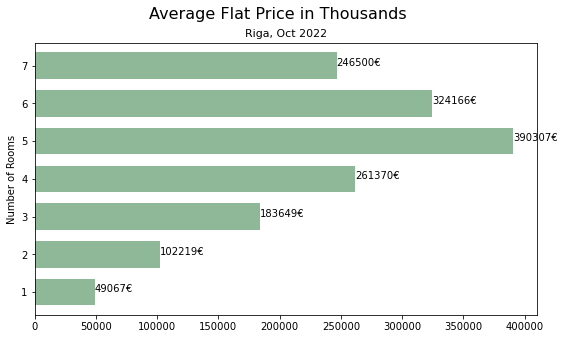

In [6]:
#average sales price in eur per nr of rooms
df_mean2=df.groupby(['Rooms'])['Price'].mean().reset_index().astype(int)
ax1=df_mean2.plot.barh( x='Rooms', y= 'Price', color= '#8EB897', figsize=(9,5),width=0.7)
#ax1.grid(linewidth=0.5,axis='x')
ax1.set_title('Riga, Oct 2022', fontsize=11)
ax1.set_ylabel("Number of Rooms", fontsize=10)
ax1.get_legend().remove()
ax1.figure.suptitle('Average Flat Price in Thousands', fontsize=16 )
y=df_mean2['Price']
for index, value in enumerate(y):
    ax1.text(value, index,
             str(value) + "€")


5 bedroom flats tend to be the most expensive.

In [7]:
df.groupby("Rooms").size()

Rooms
1    49
2    92
3    67
4    32
5    12
6     6
7     2
dtype: int64

In [8]:
#correlation coefficient
df.corr()
display_side_by_side([df.corr(), df_rent.corr()], ['Sales','Rentals'])

,Rooms,m2,Price
Rooms,1.000000,0.852900,0.671884
m2,0.852900,1.000000,0.850008
Price,0.671884,0.850008,1.000000
,Rooms,m2,Price
Rooms,1.000000,0.832485,0.688377
m2,0.832485,1.000000,0.798760
Price,0.688377,0.798760,1.000000


We see that when it comes to Sales price correlation coefficient to m2 are higher then for rentals.

Text(0, 0.5, '')

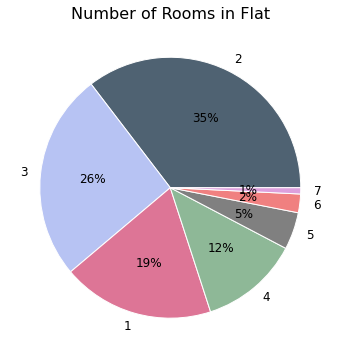

In [9]:
#number of rooms  %
room_count=df.Rooms.value_counts()
ax=room_count.plot.pie(figsize=(6,6), fontsize=12,
                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
                    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', 'grey', 'lightcoral','plum' ],
                      autopct='%.0f%%')
ax.set_title('Number of Rooms in Flat', fontsize=16)
ax.set_ylabel(None)

Majority of flats available for sale are 2 bedroom and then 3 bedroom.

In [10]:
#remove whitespace before floor number
df['Floor']=df.Floor.astype(str).str.strip()
print(len(df.Floor[0]))

3


In [11]:
#create floor categories func
def floor_to_categories(floor_str):
    num1, num2 = floor_str.split("/")
    if num1 == num2: return "Top"
    elif num1 == "1": return "Ground"
    return "Middle"
#apply func
df["Floor Type"] = df.Floor.apply(floor_to_categories)



In [12]:
df_sorted= df.sort_values("Price",ascending=False)

In [13]:
df_sorted.head(10)

,Adress,Rooms,m2,Price,Floor,Floor Type
207,Skanstes 29а,5,325,"775,000.0",23/23,Top
94,Elizabetes 12,4,181,"724,800.0",4/5,Middle
43,Brīvības 76,5,250,"650,000.0",4/6,Middle
26,Baznīcas 18A,4,142,"650,000.0",7/7,Top
120,J. Daliņa 8,5,200,"600,000.0",20/24,Middle
198,Rūpniecības 21k2,5,161,"595,000.0",7/7,Top
248,Vesetas 6,4,171,"593,300.0",2/7,Middle
252,Vīlandes 6,6,206,"512,000.0",3/4,Middle
222,Strēlnieku 5,3,90,"491,656.0",3/6,Middle
12,Ausekļa 4,4,125,"450,000.0",5/7,Middle


In [14]:
df_sorted.tail(10)

,Adress,Rooms,m2,Price,Floor,Floor Type
113,Ģertrūdes 91A,1,15,"26,000.0",2/5,Middle
157,M. Matīsa 3,1,27,"25,900.0",1/5,Ground
77,Duntes 50,2,37,"24,800.0",1/4,Ground
163,Maskavas 11,1,26,"23,850.0",1/2,Ground
165,Maskavas 11,1,24,"22,000.0",1/2,Ground
152,Lenču 2,1,50,"20,000.0",1/6,Ground
164,Maskavas 11,1,22,"19,950.0",1/2,Ground
127,Katrīnas 8,1,30,"18,700.0",1/2,Ground
253,Zaķu 6,1,31,"18,000.0",2/2,Top
126,Katrīnas 8,3,36,"17,500.0",2/2,Top


In [15]:
df.groupby("Floor Type").Price.mean().astype(int).reset_index()

,Floor Type,Price
0,Ground,115469
1,Middle,162285
2,Top,171186


We see that on average top floor tend be be more expensive, however looking at top 10 most expensive properties for sale majority of them are on the middle floor.And the majority of the cheapest properties are on the ground floor.

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

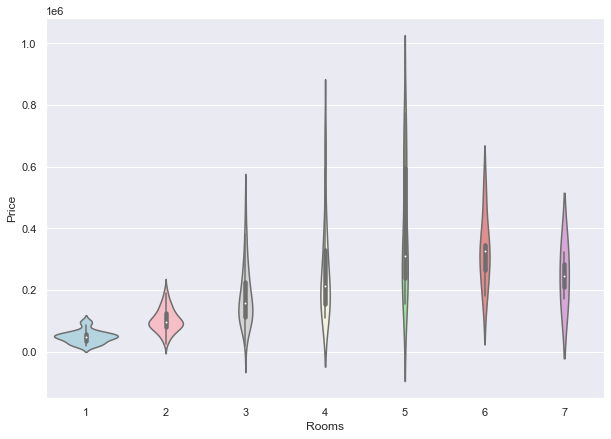

In [16]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.violinplot(x="Rooms", y="Price", data=df,
               palette=["lightblue", "lightpink","lightgrey",'beige','lightgreen','lightcoral','plum'])


One bedroom flats tend to sell around medium price this is still noticeable for two bedroom flats as well , while the other flats very vary in price.

In [17]:
#create size categories for m2 using condition statements

category = []
for i in df_sorted['m2']:
    if i <=30:
        category.append('Small')   
    elif i <= 80:
        category.append('Normal')
    elif i <= 160:
        category.append('Big')
    else:
        category.append('Huge')

df_sorted['Size Category'] = category
print(df_sorted.head(10))

               Adress  Rooms   m2     Price  Floor Floor Type Size Category
207      Skanstes 29а      5  325 775,000.0  23/23        Top          Huge
94      Elizabetes 12      4  181 724,800.0    4/5     Middle          Huge
43        Brīvības 76      5  250 650,000.0    4/6     Middle          Huge
26       Baznīcas 18A      4  142 650,000.0    7/7        Top           Big
120       J. Daliņa 8      5  200 600,000.0  20/24     Middle          Huge
198  Rūpniecības 21k2      5  161 595,000.0    7/7        Top          Huge
248         Vesetas 6      4  171 593,300.0    2/7     Middle          Huge
252        Vīlandes 6      6  206 512,000.0    3/4     Middle          Huge
222      Strēlnieku 5      3   90 491,656.0    3/6     Middle           Big
12          Ausekļa 4      4  125 450,000.0    5/7     Middle           Big


When we looked at rentals, top floors were the most expensivest however it's not true for apartments for sales, here size matters more.

<AxesSubplot:xlabel='Size Category', ylabel='Price'>

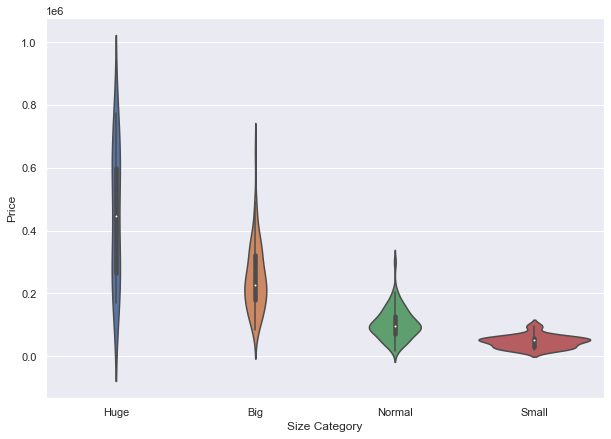

In [18]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.violinplot(x="Size Category", y="Price", data=df_sorted)


In [19]:
#explore price in each size category
df_sorted.groupby('Size Category')[['Price']].aggregate([min, max, 'mean']).astype(int).reset_index()

Size Category   Price                
                    min     max    mean
0           Big   85000  650000  249948
1          Huge  169000  775000  449162
2        Normal   17500  303200  104211
3         Small   18700   96200   47215

In [24]:
function_dictionary = {'m2':'mean','Price':'mean'}
df_sorted.groupby("Rooms").aggregate(function_dictionary).astype(int).reset_index()

,Rooms,m2,Price
0,1,29,49067
1,2,50,102219
2,3,82,183649
3,4,114,261370
4,5,167,390307
5,6,175,324166
6,7,170,246500


In [21]:
#explore number of flats available in each size category
df_sorted.groupby("Size Category").size()

Size Category
Big        64
Huge       14
Normal    153
Small      29
dtype: int64

In [22]:
#Price-to-Rent Ratio
df['Price'].mean() /(df_rent['Price'].mean() * 12) 

22.313282872568994

Price-to-rent ratio of 21 or more indicates it is much better to rent than buy.